# Impact of Gerrymandering in the 2016 House of Representatives Election

In [31]:
import importlib 
import get_data_v2 as get_data
import get_dviz_v2 as get_dviz
#import seaborn as sns
from scipy import stats
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
from scipy.ndimage.measurements import center_of_mass
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
%matplotlib inline

In [73]:
_ = importlib.reload(get_data)
_ = importlib.reload(get_dviz)

## Get the Data
Source data: https://www.nytimes.com/elections/results/house <br>

In [33]:
election_results = get_data.get_nyt_election_results()
#print(election_results.columns)
election_results.head(3)

Retrieving clean data ('data/candidate_results_clean.csv')
Done!


candidate_id candidate_key first_name  incumbent  last_name  \
0        young-513        youngd        Don       True      Young   
1   lindbeck-65461     lindbecks      Steve      False   Lindbeck   
2  mcdermott-62643    mcdermottj        Jim      False  McDermott   

     name_display  order     party_id  percent  percent_display      ...       \
0       Don Young      4   republican     50.5             50.5      ...        
1  Steve Lindbeck      1     democrat     36.2             36.2      ...        
2   Jim McDermott      2  libertarian     10.3             10.3      ...        

   winner2 uncontested   party_id2  state_seat_count  district_vote_count  \
0        1           0  republican                 1               306970   
1        0           0    democrat                 1               306970   
2        0           0       other                 1               306970   

   state_vote_count district_candidate_count  wasted_winning_votes  \
0            306970                        4               44068.0   
1            306970                        4                   0.0   
2            306970                        4                   0.0   

   wasted_losing_votes  wasted_votes  
0                    0       44068.0  
1               111019      111019.0  
2                31770       31770.0  

[3 rows x 24 columns]

## Question 1:  Where did the votes go?

**Republican electors casted about 1% more votes than democrats in the 2016 House of Representatives election.  Yet, they were able to elect about 24% more candidates than democrats.**  

In [34]:
# checking overall results
overall = get_data.get_overall_results(election_results)
overall.head()

Party     Votes  Seats_Won    %_Votes  %_Seats_Won  \
2  republican  62776697        241  48.938674    55.402299   
0    democrat  61991242        194  48.326359    44.597701   
1       other   3508313          0   2.734967     0.000000   

   Votes_to_Elect_Candidate  %_Total_Votes  sort_order  
2              2.604842e+05       0.203065           1  
0              3.195425e+05       0.249105           2  
1                       inf            inf           3

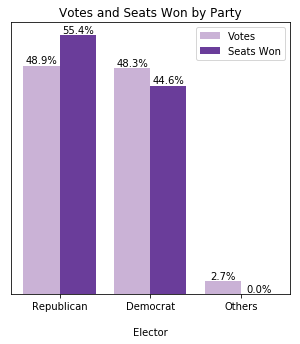

In [35]:
fig, ax = plt.subplots(figsize=(5,5))
_ = get_dviz.plot_votes_and_seats_won_by_party(overall, fig, ax)

## Question 2:  Do republican electors have more power?

Power is defined by the Merriam-Webster as the ["ability to act or produce an effect"](https://www.merriam-webster.com/dictionary/power) .  **On average it took roughly 20% more Democratic electors to win a seat for their party than it took Republican electors to elect a Republican candidate.**  In that sense, Republican electors had more power in the 2016 House of Representative elections. 

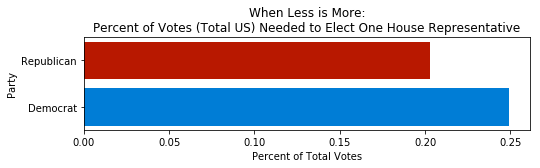

In [36]:
_ = get_dviz.plot_when_less_is_more_national(overall)

## Question 3:  How do state and national numbers compare?

Numbers at the state level reveal even more strikingly that Democrat electors needed more votes on average to elect their representatives to the House of Representatives than did Republican electors.  The horizontal lines on the graphs below show the national average votes needed to elect a candidate of each party.  

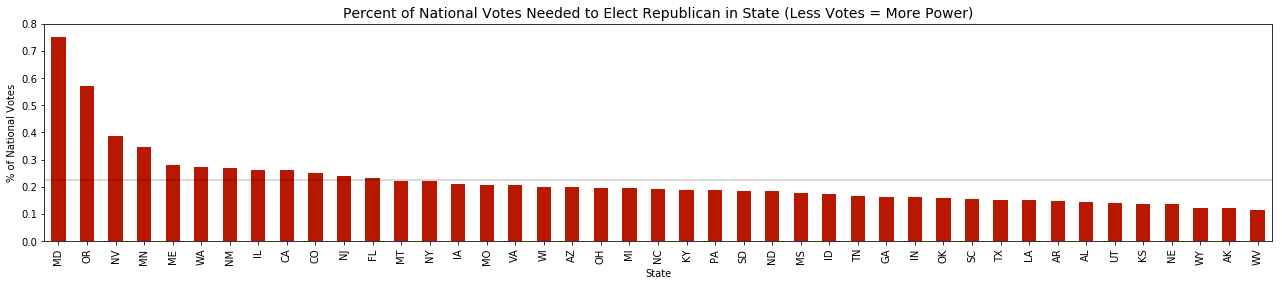

In [37]:
bystate = get_data.get_results_bystate(election_results)
fig, ax = plt.subplots(1,1,figsize=(22,4))
_ = get_dviz.plot_when_less_is_more_by_state_party(overall, bystate, 'republican', fig, ax)

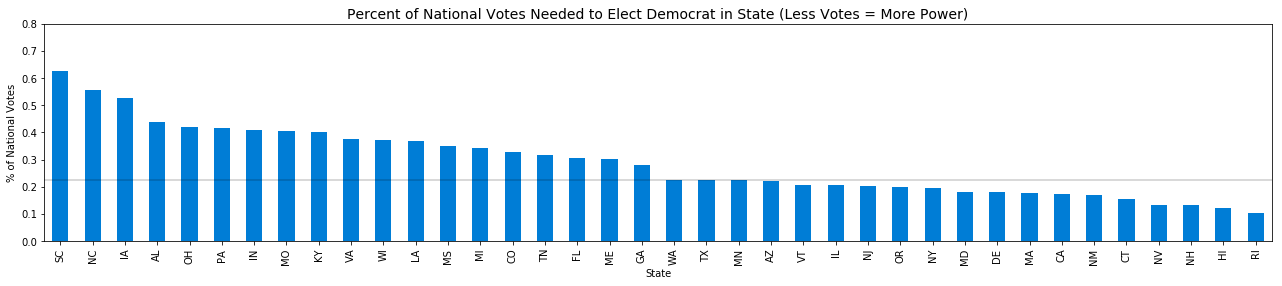

In [38]:
fig, ax = plt.subplots(1,1,figsize=(22,4))
_ = get_dviz.plot_when_less_is_more_by_state_party(overall, bystate, 'democrat', fig, ax)

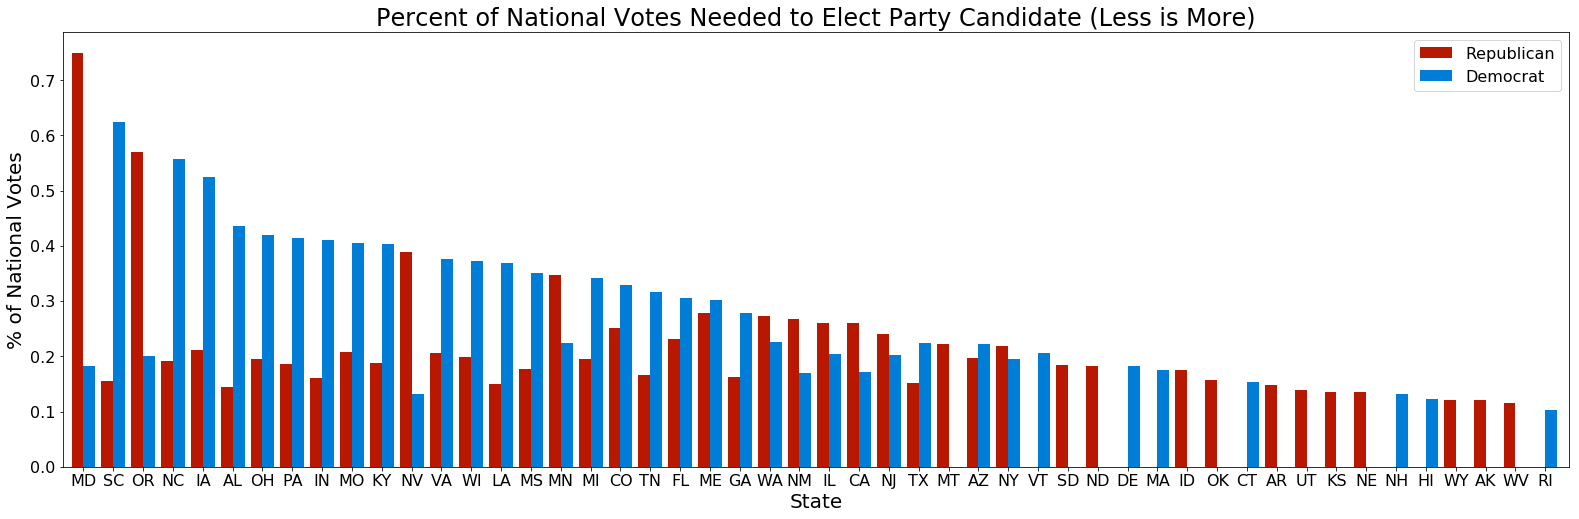

In [39]:
_ = importlib.reload(get_dviz)
fig, ax = plt.subplots(1,1,figsize=(27,8))
_ = get_dviz.plot_when_less_is_more_by_state(bystate, fig, ax)

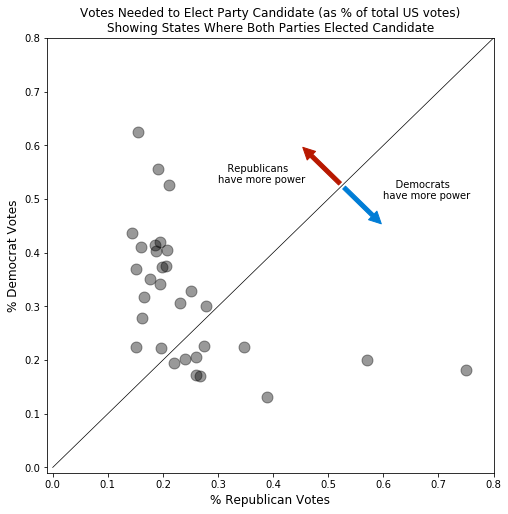

In [40]:
_ = importlib.reload(get_dviz)
fig, ax = plt.subplots(1,1,figsize=(8,8))
_ = get_dviz.plot_when_less_is_more_scatter(bystate, fig, ax)

## Question 4:  How do party numbers compare at the state level?

The problem we saw with Democratic electors needing to cast more votes to elect their candidates is exacerbated when we look at numbers at the state level.  Clearly democrats were disadvantaged in more states, and often in a more significant way. 

### Looking closer at 4 extreme examples where Democrat electors have more power:

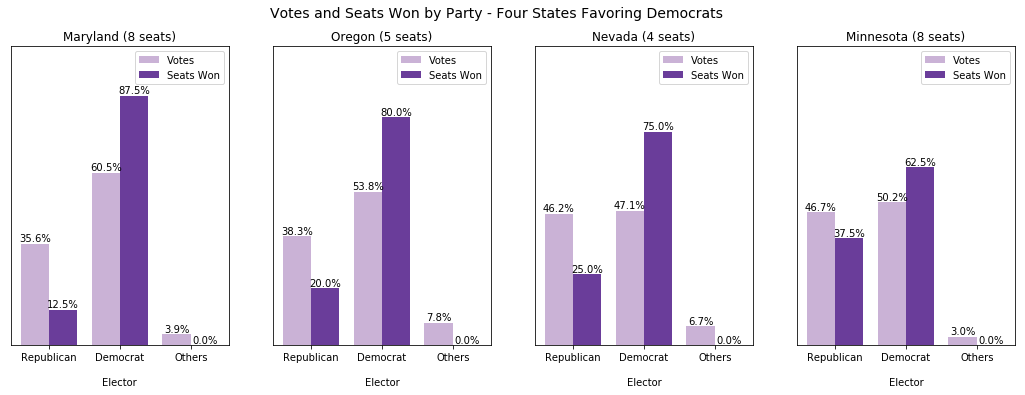

In [41]:
fig, ax = plt.subplots(1,4,figsize=(18,5.5))
figtitle = 'Votes and Seats Won by Party - Four States Favoring Democrats'
_ = get_dviz.plot_when_less_is_more_state_detail(election_results, fig, ax, figtitle, 'MD', 'OR', 'NV', "MN")

### Looking closer at 4 extreme examples where Republican electors have more power:

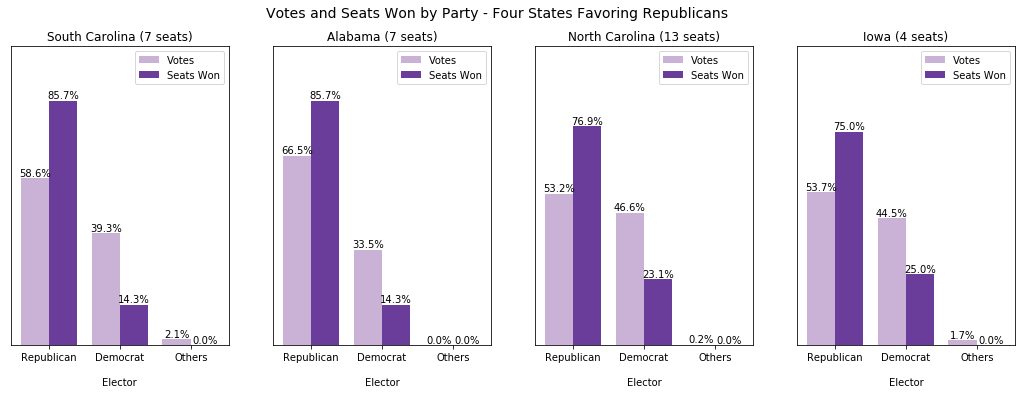

In [42]:
fig, ax = plt.subplots(1,4,figsize=(18,5.5))
figtitle = 'Votes and Seats Won by Party - Four States Favoring Republicans'
_ = get_dviz.plot_when_less_is_more_state_detail(election_results, fig, ax, figtitle, 'SC', 'AL', 'NC', "IA")

## Question 5:  How are votes cast on states where a party has extreme advantage?

By looking at the plot from Question 3 we can identify many states where one of the two parties appears to have substantially more power.  We can now analyze 3 states at a time.

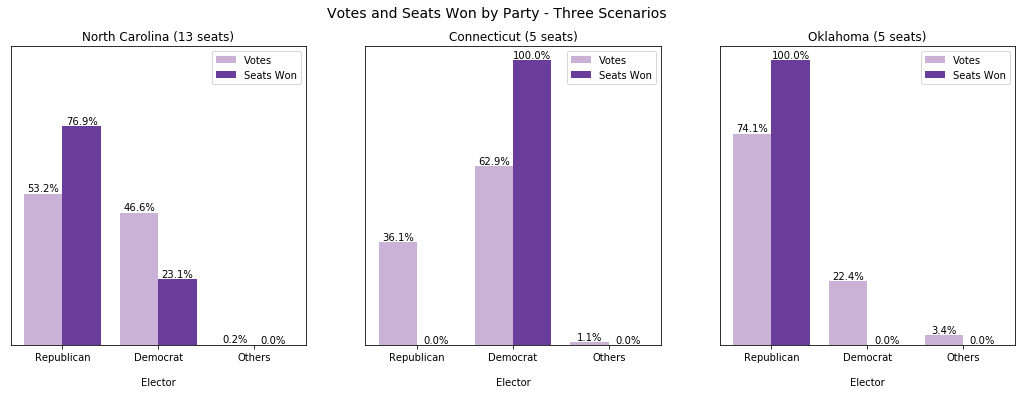

In [43]:
fig, ax = plt.subplots(1,3,figsize=(18,5.5))
figtitle = 'Votes and Seats Won by Party - Three Scenarios'
_ = get_dviz.plot_when_less_is_more_state_detail(election_results, fig, ax, figtitle, 'NC','CT', 'OK')

## Question 6: Can the efficiency gap help identify gerrymandering?

Nicholas O. Stephanopoulos and Eric M. McGhee in their article Partisan Gerrymandering and the Efficiency
Gap, in which they create the Efficiency Gap metric, suggest a threshold to identify gerrymandering.  They "recommend setting the bar at two seats for congressional plans and 8 percent for state house plans" [Stephanopoulos, Nicholas O., and Eric M. McGhee. "Partisan gerrymandering and the efficiency gap." The University of Chicago Law Review (2015): 831-900.]

Below we identify states where a party "lost" 2 or more seats.  We do not calculate the efficiency gap percent metric because according to the authors the metric percentage threshold applies to state house elections only.

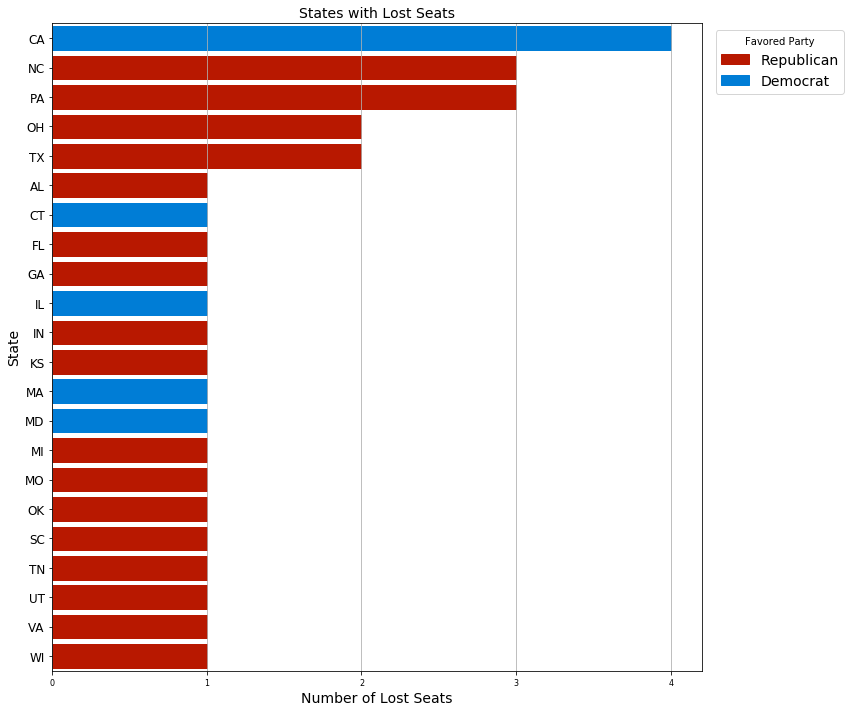

In [86]:
_ = importlib.reload(get_dviz)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
_ = get_dviz.plot_efficiency_gap_seat(bystate, ax, True)

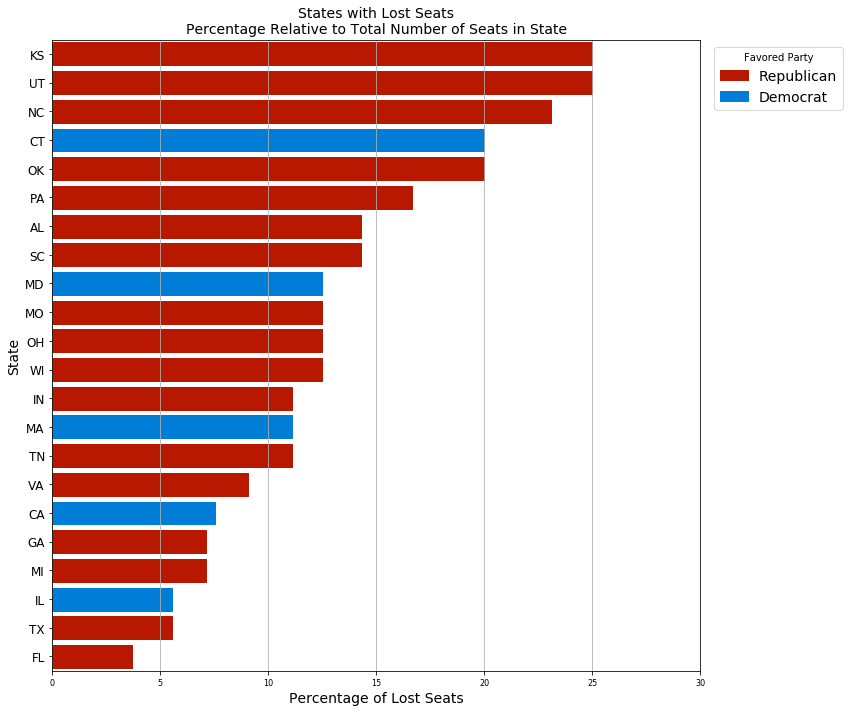

In [87]:
_ = importlib.reload(get_dviz)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
_ = get_dviz.plot_efficiency_gap_seat_percent(bystate, ax, True)

### Now, using wasted votes as input to compute the Efficiency Gap. 
** All votes from winner candidate beyond simple majority are considered wasted votes.** <br>
** All votes from losing candidate are considered wasted votes.** <br>

** We exclude states with a single district, since gerrymandering doesn't apply in those cases. **

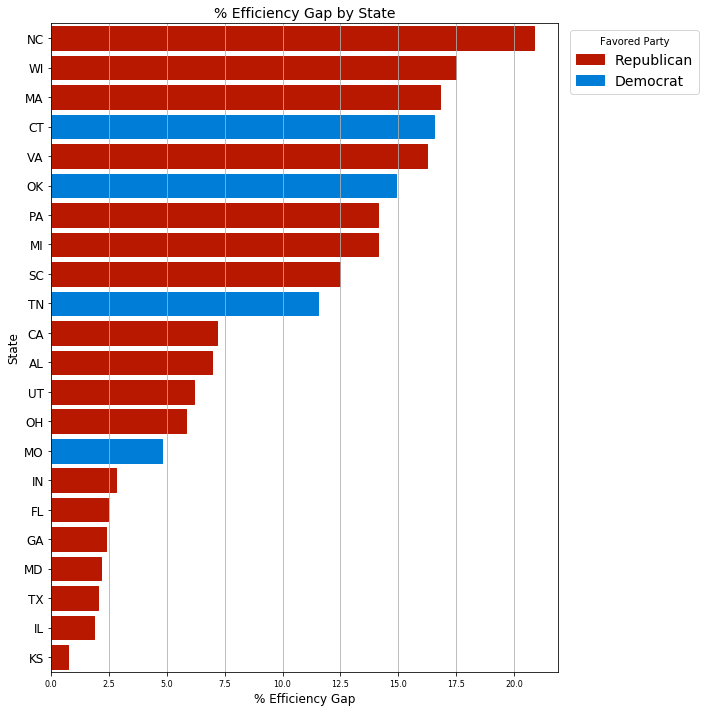

In [89]:
# states with missed seats
_ = importlib.reload(get_dviz)
f, ax = plt.subplots(figsize=(8, 10))
eg = get_data.get_efficiency_gap(election_results, bystate)
_ = get_dviz.plot_efficiency_gap(eg, fig, ax, True)

### Exploring the correlation between percent seats lost and efficiency gap

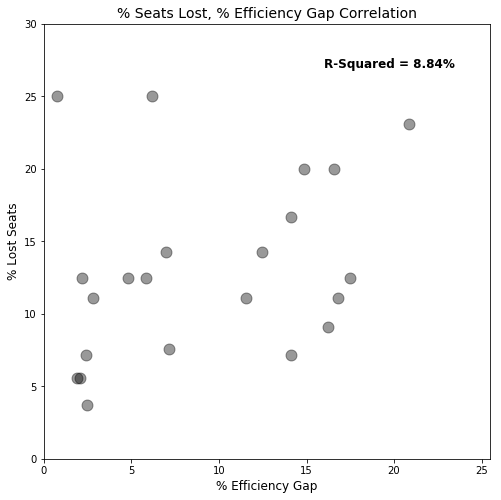

In [47]:
_ = importlib.reload(get_dviz)
fig, ax = plt.subplots(1,1,figsize=(8,8))
_ = get_dviz.plot_efficiency_gap_percent_lost_seats(eg, bystate, fig, ax)

### Exploring the correlation between percent seats lost and uncontested seats won

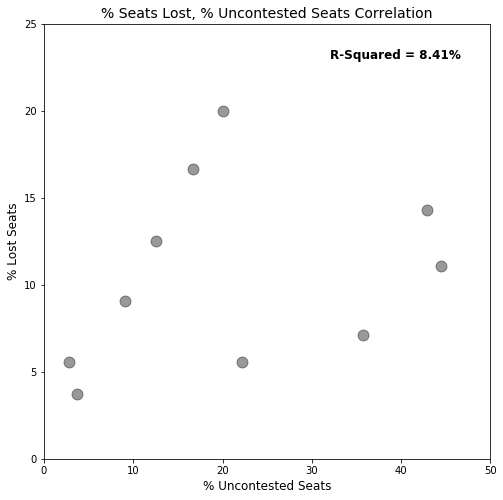

In [48]:
_ = importlib.reload(get_dviz)
fig, ax = plt.subplots(1,1,figsize=(8,8))
_ = get_dviz.plot_uncontested_seats_percent_lost_seats(election_results, bystate, fig, ax)

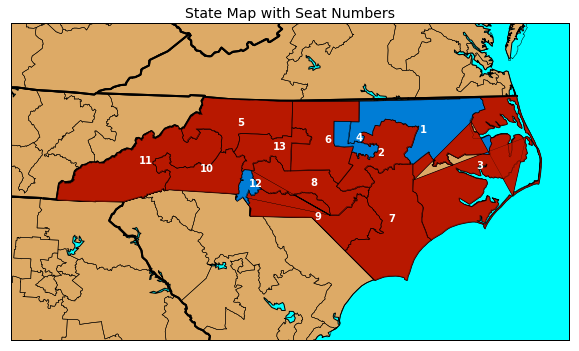

In [123]:
_ = importlib.reload(get_dviz)
state = 'NC'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
_ = get_dviz.print_district_map(election_results, state, ax, False)
#plt.savefig("TX_map.png")

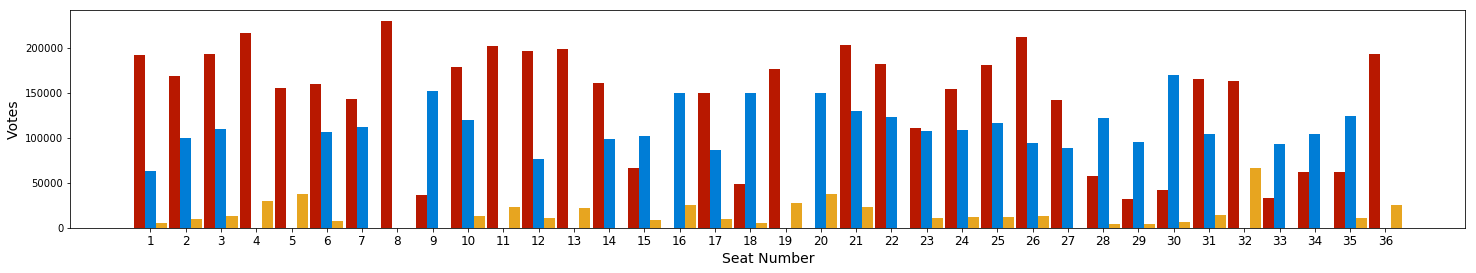

In [119]:
state = 'TX'
fig = plt.figure(figsize=(25,4))
ax = fig.add_subplot(111)
_ = get_dviz.plot_state_votes_by_seat(election_results, state, ax)

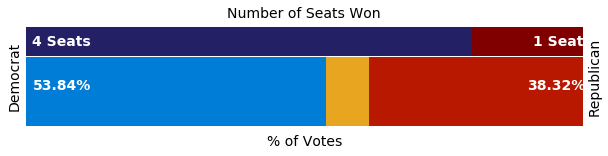

In [80]:
state = 'OR'
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(111)
_ = get_dviz.plot_missed_seats_by_state(bystate, state, ax, False)

Saving images/state_summary_results_CO.png
Saving images/state_summary_results_CO.png
Saving images/state_summary_results_CO.png


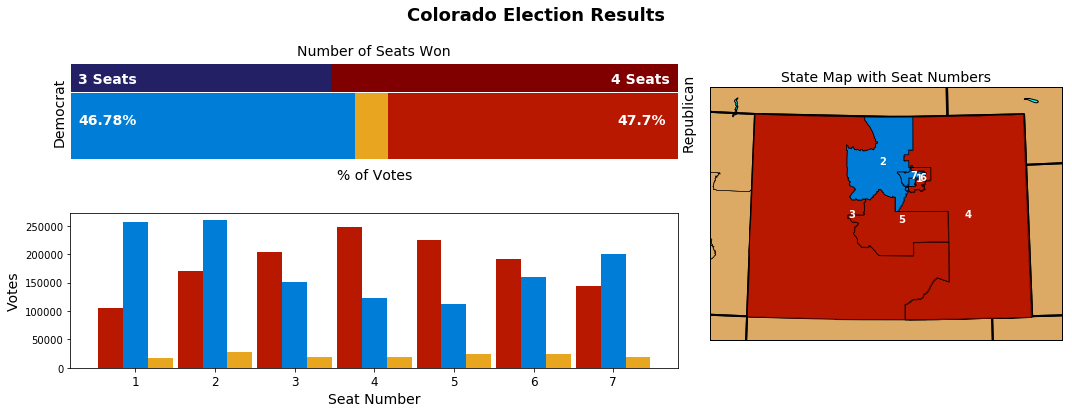

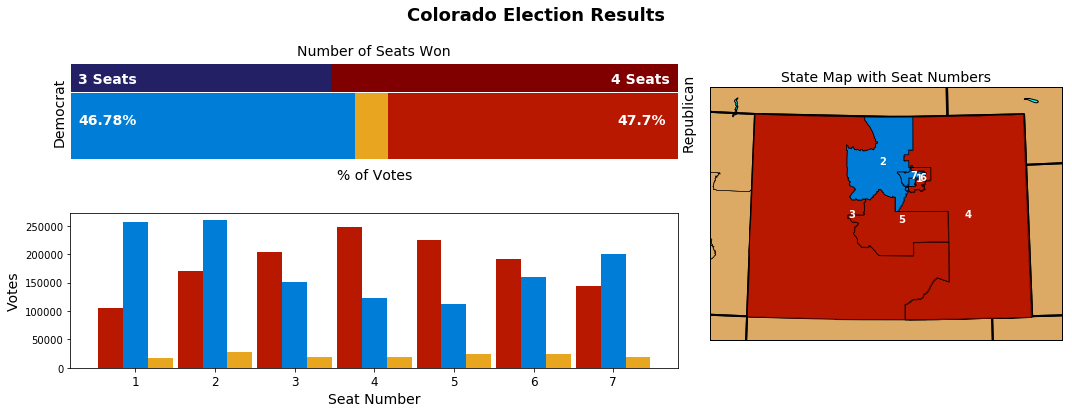

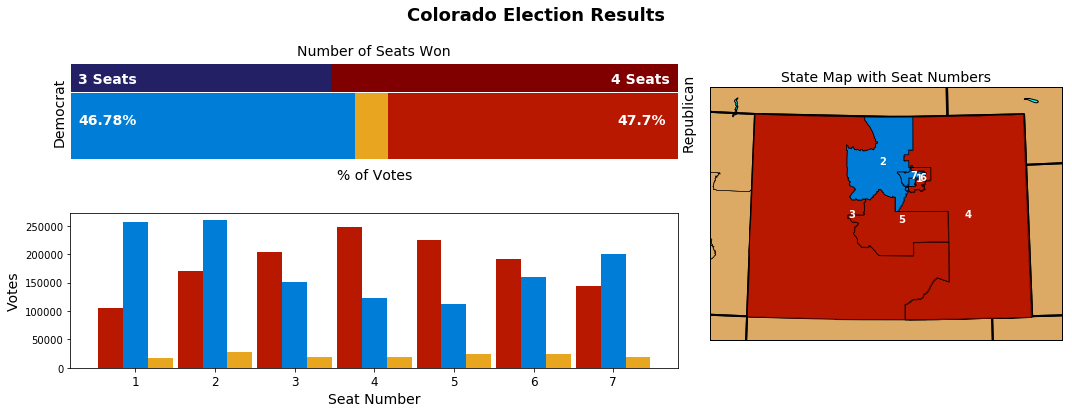

In [110]:
_ = importlib.reload(get_dviz)
#df = bystate[bystate['Missed_Seats']==0].sort_values(['Missed_Seats','State'], ascending=[False, True])
#df = pd.DataFrame(bystate['State'].drop_duplicates(), columns=['State'])
df = bystate[((bystate['Missed_Seats']==0) & (bystate['State_Seat_Count']>1))].sort_values(['Missed_Seats','State'], ascending=[False, True])
for state in df['State'].values:  
    if state == "CO":
        _ = get_dviz.print_state_summary_results(election_results, bystate, state, True)
    #plt.show()

## Question 7: Should we rule out gerrymandering for states that do not cross threshold?

Nicholas O. Stephanopoulos and Eric M. McGhee in their article Partisan Gerrymandering and the Efficiency
Gap, in which they create the Efficiency Gap metrict, suggest a threshold to identify gerrymandering.  They "recommend setting the bar at two seats for congressional plans and 8 percent for state house plans" [Stephanopoulos, Nicholas O., and Eric M. McGhee. "Partisan gerrymandering and the efficiency gap." The University of Chicago Law Review (2015): 831-900.]

Below we identify states where a party "lost" only 1 seat, and therefore do not cross the threshold proposed by the authors.  Should we rule out gerrymandering for those states?

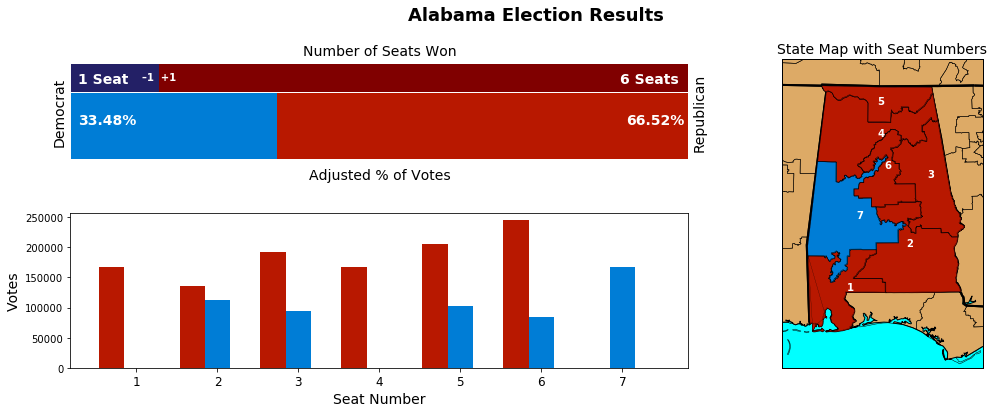

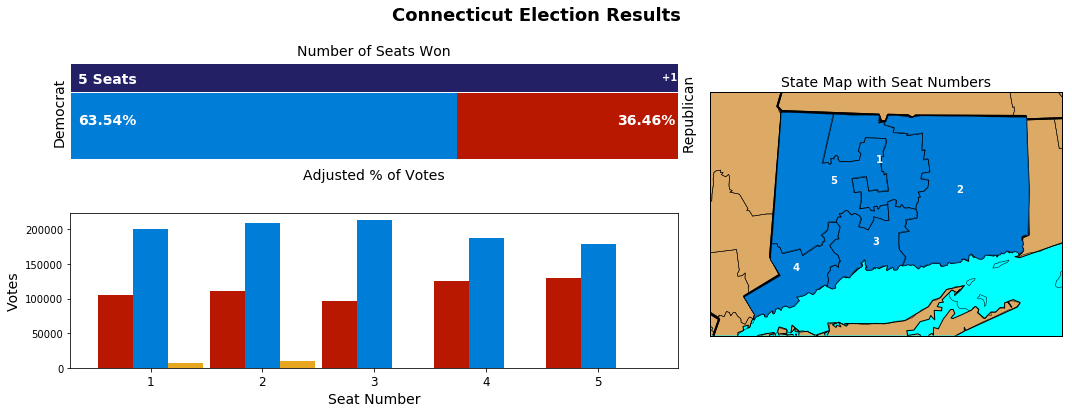

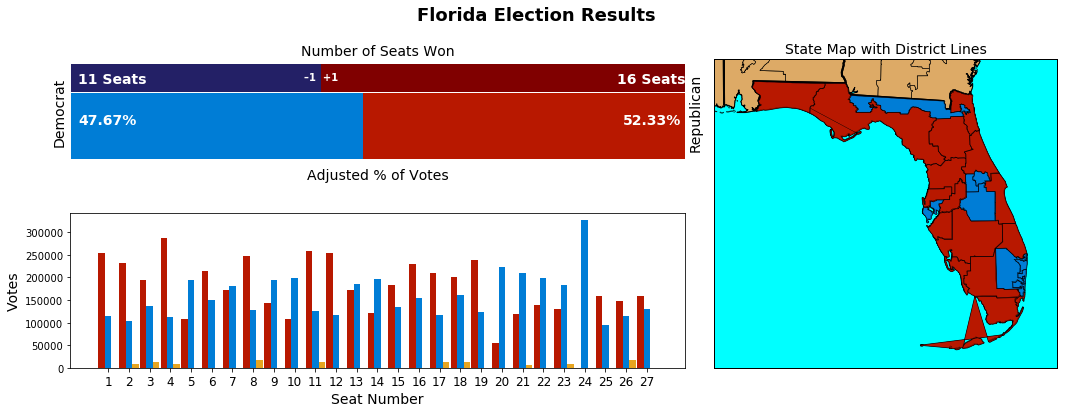

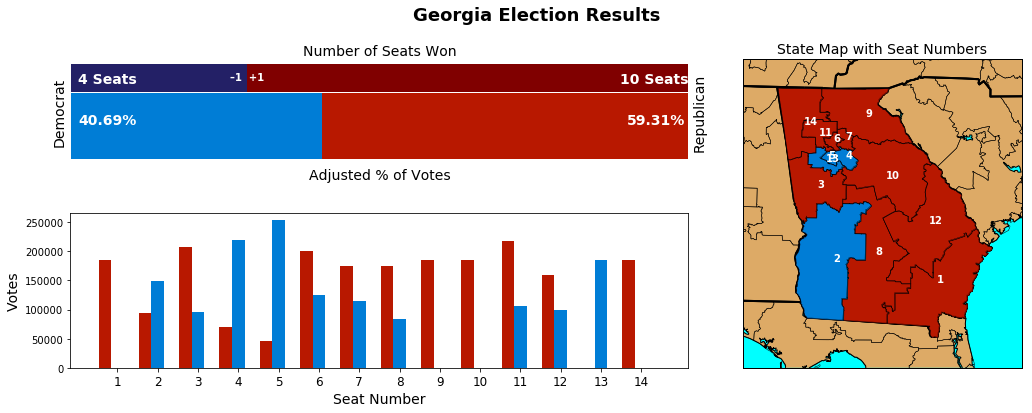

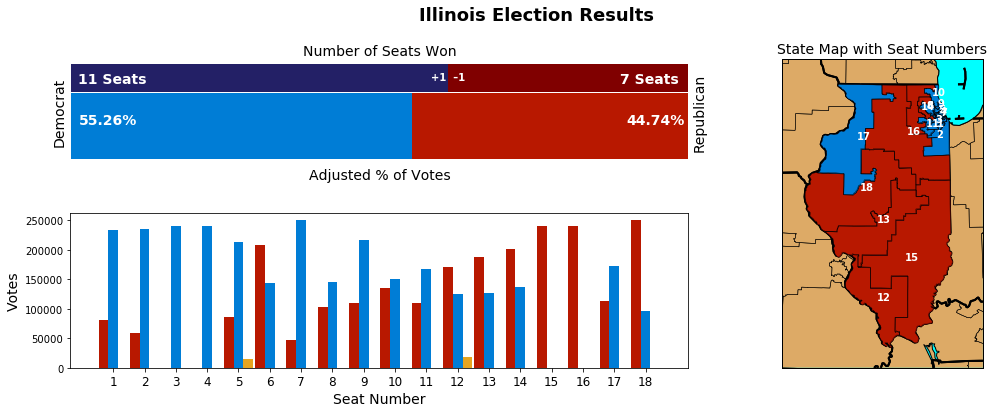

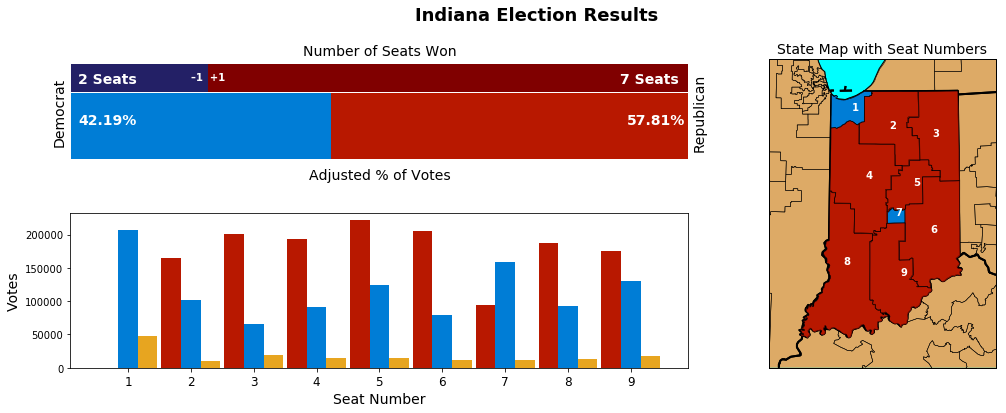

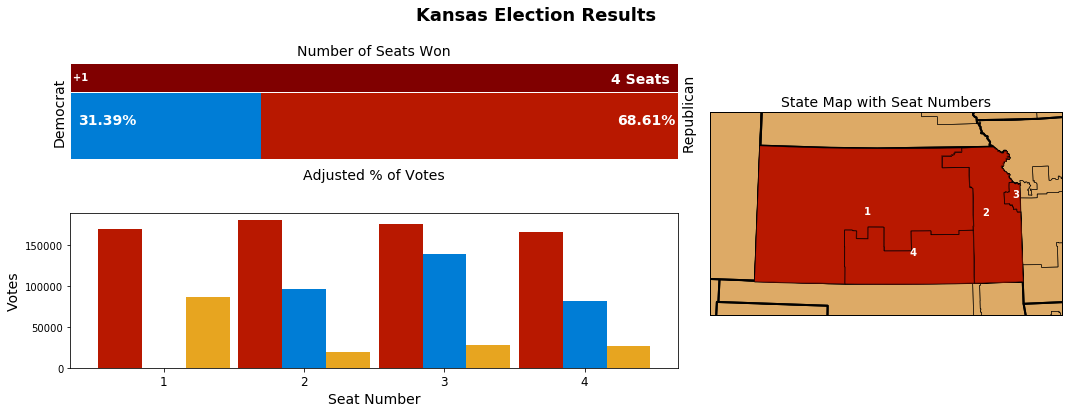

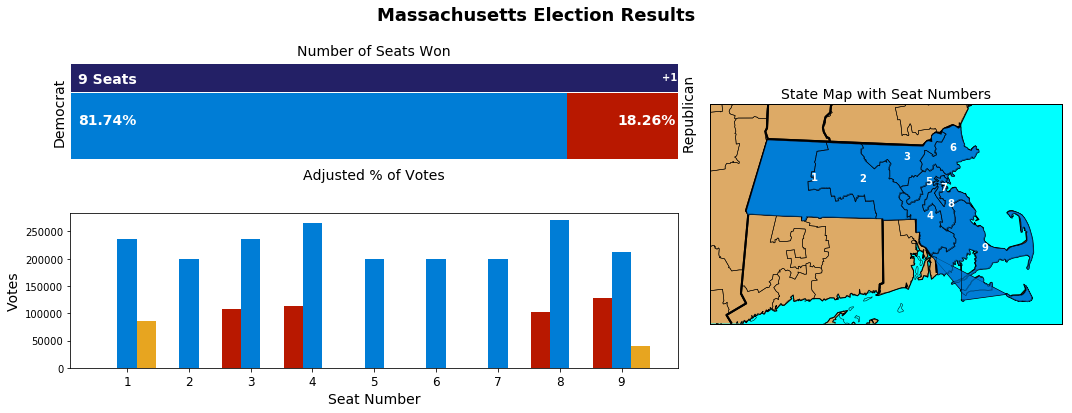

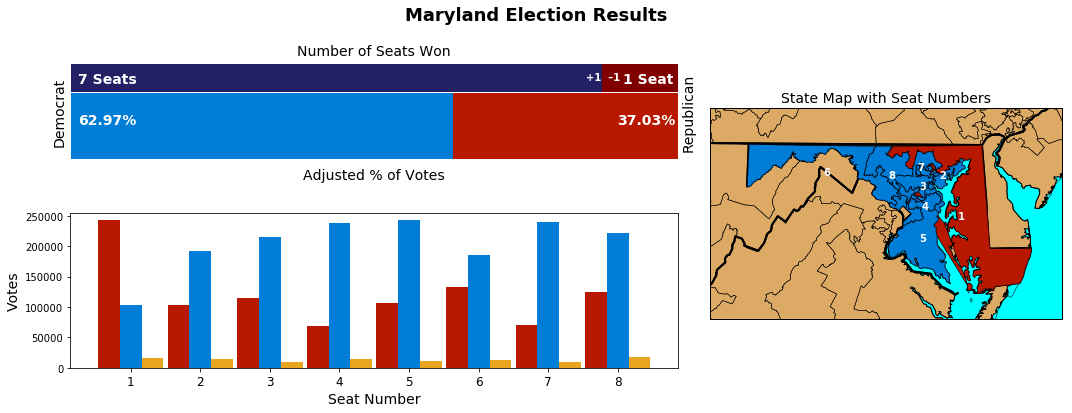

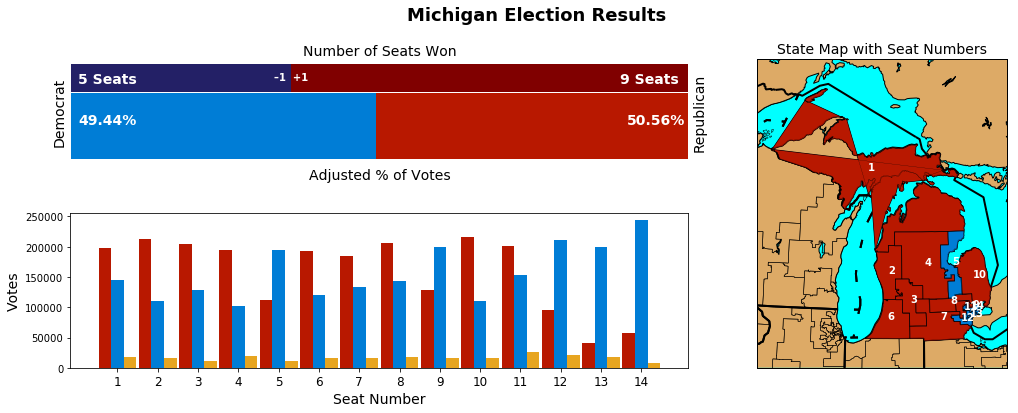

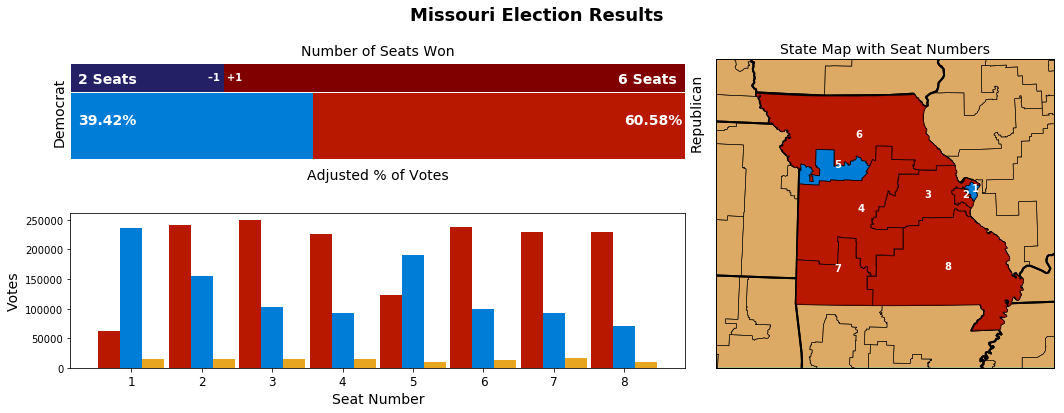

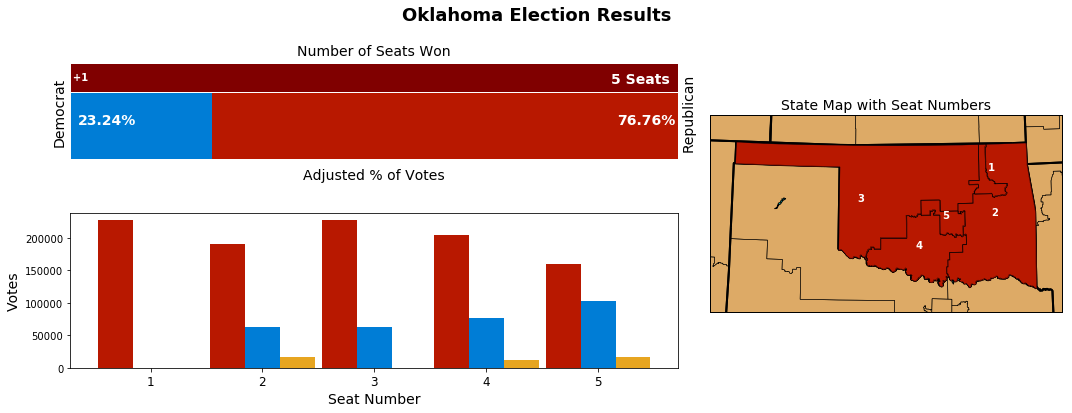

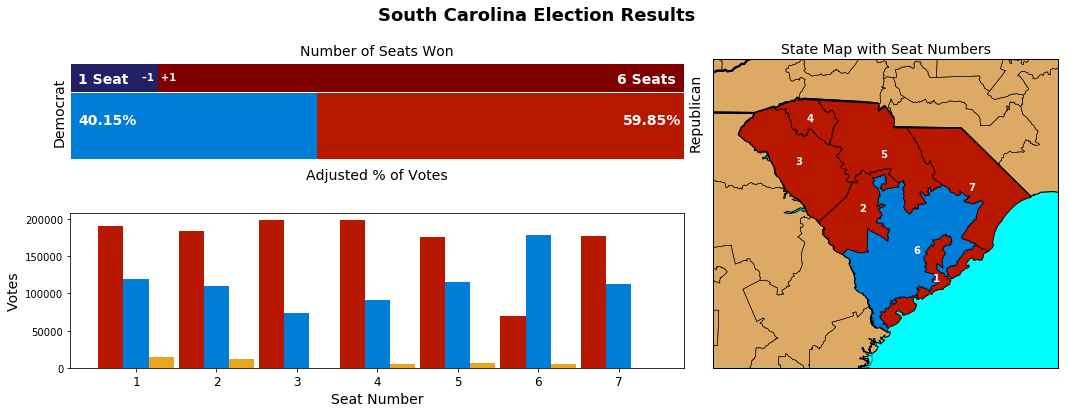

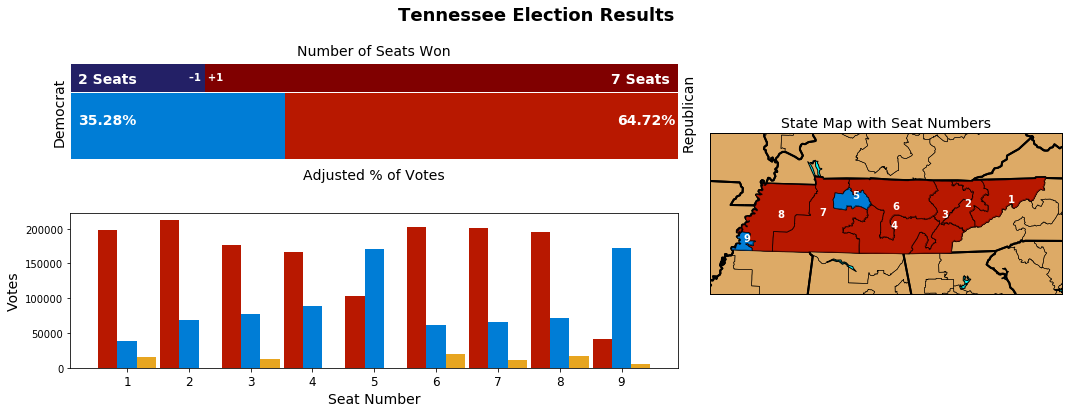

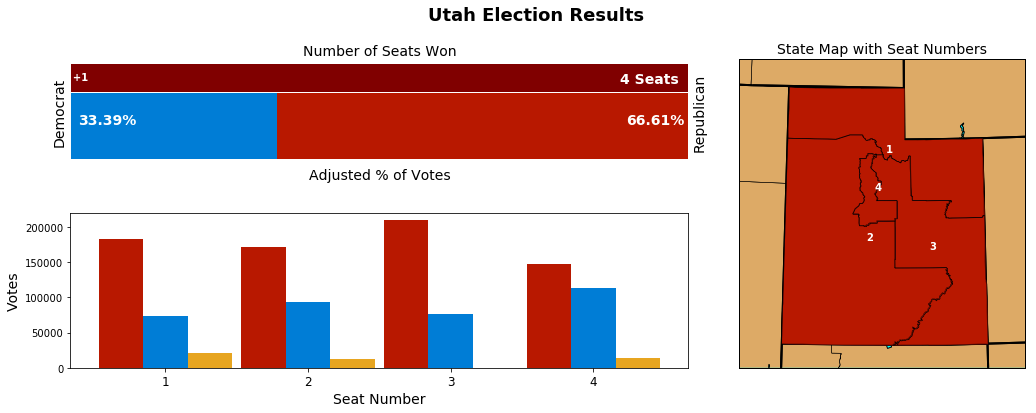

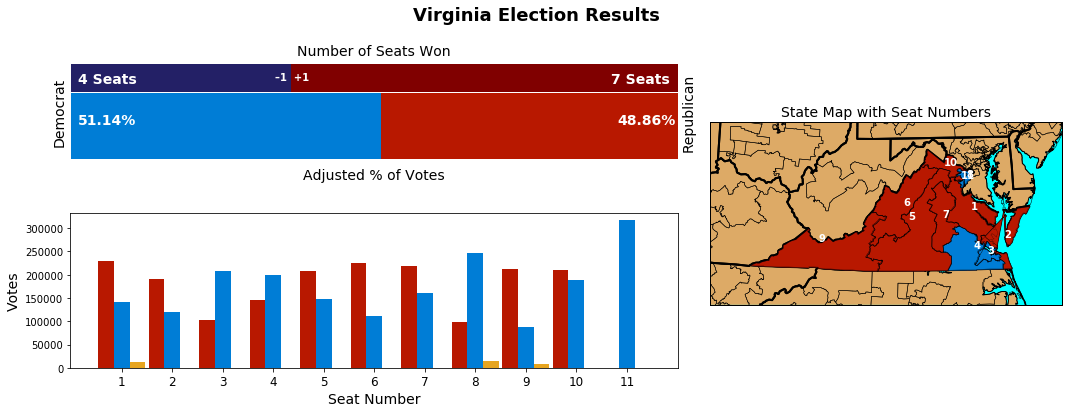

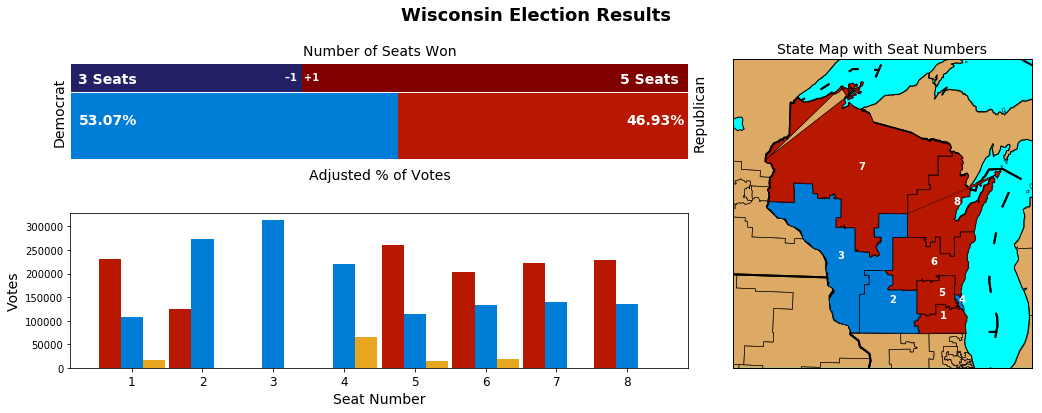

In [21]:
df = bystate[bystate['Missed_Seats']==1].sort_values(['Missed_Seats','State'], ascending=[False, True])
for state in df['State'].values:  
    #if state == "AL":
    _ = get_dviz.print_state_summary_results(election_results, bystate, state, False)
    #plt.show()